### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [146]:
data = pd.read_csv('data/coupons.csv')

In [147]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [149]:
#Using the .rename to change the Y column title 
data = data.rename(columns={'Y': 'Accepted'})

In [150]:
#calculating the sum of missing cells in each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accepted                    0
dtype: int64

In [151]:
#Calculating the percentage of missing cells in each column from total number of rows in the dataframe
#To get more insight on the missing data
(data.isnull().sum() / len(data))*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accepted                 0.000000
dtype: float64

From the above output, we can see that 6 columns have missing values. However, the column "car" has the most missing values (99% of the data is missing). As a result, this column will be discarded from the DataFrame and from further analysis. On the other hand, the mode will be used to fill the missing values for the remaining 5 columns. The mode to impute the missing values used because the percentage of missing data in these columns are not high. Thus, potential bias is minimal.

In [152]:
#Since "car" column contains no useful information, this column is dropped using the .drop() method.
data.drop('car',axis='columns', inplace=True)
#Calcaulting the mode for the remaining columns
data[['Bar', 'CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].mode()

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,never,less1,1~3,1~3,less1


In [153]:
#Using the .fillna to fill the missing cells with their corresponding mode
data['Bar'].fillna('never', inplace=True)
data['CoffeeHouse'].fillna('less1', inplace=True)
data['CarryAway'].fillna('1~3', inplace=True)
data['RestaurantLessThan20'].fillna('1~3', inplace=True)
data['Restaurant20To50'].fillna('less1', inplace=True)

In [154]:
#checking the data again for missing values
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accepted                0
dtype: int64

In [155]:
#Summary for continuous variables
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
#Summary of for the categorical 'age' column
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

After checking all categorical columns using the .value_counts(), replacement for specific strings was done using the .replace 
Columns that required modifications were 'age','Bar', 'CoffeeHouse', 'CarryAway','RestaurantLessThan20', 'Restaurant20To50', 'passanger', and 'income'.

In [157]:
data["age"] = data["age"].replace(['below21','21','26','31','36','41','46','50plus'],
                              ['<21','21 - 25','26 - 30','31 - 35','36 - 40','41 - 45','46 - 50','50+'])
data["Bar"] = data["Bar"].replace(['1~3','4~8'],['1 - 3','4 - 8'])
data["CoffeeHouse"] = data["CoffeeHouse"].replace(['1~3','4~8'],['1 - 3','4 - 8'])
data["CarryAway"] = data["CarryAway"].replace(['1~3','4~8'],['1 - 3','4 - 8'])
data["RestaurantLessThan20"] = data["RestaurantLessThan20"].replace(['1~3','4~8'],['1 - 3','4 - 8'])
data["Restaurant20To50"] = data["Restaurant20To50"].replace(['1~3','4~8'],['1 - 3','4 - 8'])
data["passanger"] = data["passanger"].str.replace("\(s\)","")
data["income"] = data["income"].str.replace("$","")

/var/folders/sg/crty_38n2fv_yyvdd8pnnkqr0000gn/T/ipykernel_79112/616202986.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data["passanger"] = data["passanger"].str.replace("\(s\)","")
/var/folders/sg/crty_38n2fv_yyvdd8pnnkqr0000gn/T/ipykernel_79112/616202986.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["income"] = data["income"].str.replace("$","")


I will introduce two new column in the dataframe called 'age_group' and 'bar_group'. This will help me in the crosstab for the hypothesis testing question (in the old version notebook)

In [158]:
data["bar_group"] = data["Bar"].replace(['never','less1','1 - 3','4 - 8','gt8'],
                                        ['less than 1','less than 1','more than 1','more than 1','more than 1'])
data["age_group"] = data["age"].replace(['<21','21 - 25','26 - 30','31 - 35','36 - 40','41 - 45','46 - 50','50+'],
                                        ['≤25','≤25','>25','>25','>25','>25','>25','>25'])

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [160]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted,bar_group,age_group
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,0,1,1,less than 1,≤25
1,No Urgent Place,Friend,Sunny,80,10AM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,0,1,0,less than 1,≤25
2,No Urgent Place,Friend,Sunny,80,10AM,Carry out & Take away,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,1,less than 1,≤25
3,No Urgent Place,Friend,Sunny,80,2PM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25
4,No Urgent Place,Friend,Sunny,80,2PM,Coffee House,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25


3. Decide what to do about your missing data -- drop, replace, other...

In [161]:
## As shown in question 2, I chose to drop the 'car' column 
#and fill the missing values for the remaining columns using the mode
#I chose to do so in question 2, because I wanted a full dataset before modifying some columns' values

4. What proportion of the total observations chose to accept the coupon? 



Text(0.5, 1.0, 'Percentage of drivers who accepted the coupon')

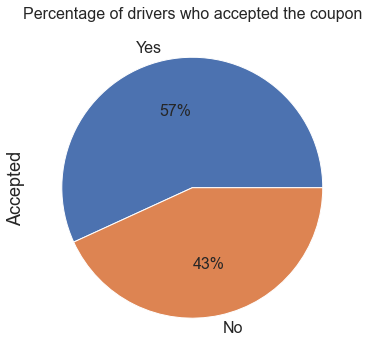

In [162]:
labels = ['Yes','No']
data['Accepted'].value_counts().plot(kind='pie',autopct='%.0f%%',labels = labels, figsize = (6,6), fontsize=16)
plt.title("Percentage of drivers who accepted the coupon", {"size" : 16})

In [163]:
Overall_Acceptance = ((data['Accepted'].sum()/ len(data))*100).round(0)

print("The proportion of the total observations chose to accept the coupon is", Overall_Acceptance,"%")

The proportion of the total observations chose to accept the coupon is 57.0 %


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Bar plot for different coupon types')

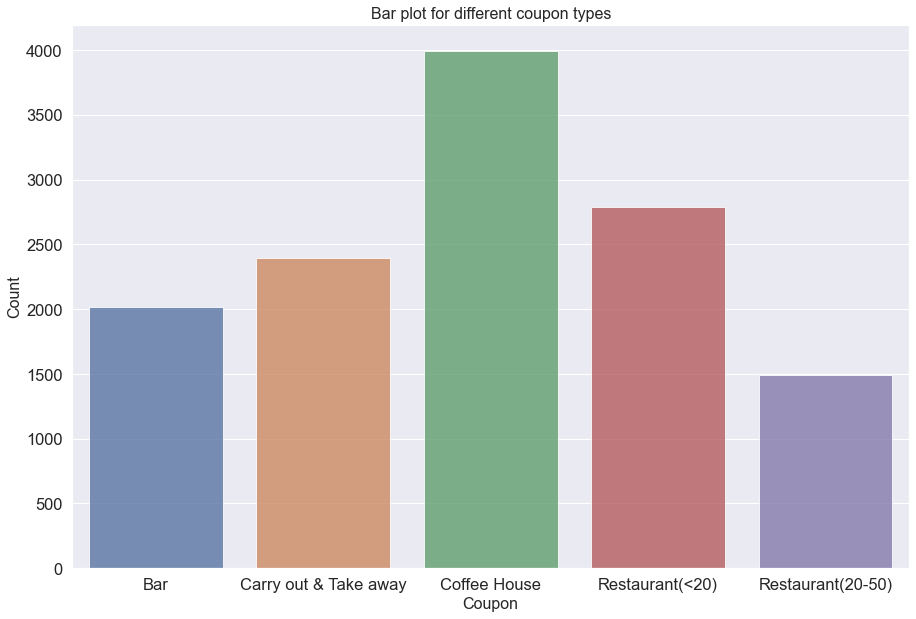

In [164]:
coupon_counts = data['coupon'].value_counts()

sns.set(font_scale = 1.5)
plt.figure(figsize=(15,10))
barplot=sns.barplot(x = coupon_counts.index, y = coupon_counts.values, alpha=0.8,
            order=["Bar", "Carry out & Take away","Coffee House","Restaurant(<20)","Restaurant(20-50)"])
barplot.set_xlabel("Coupon",fontsize=16)
barplot.set_ylabel("Count",fontsize=16)
barplot.set_title("Bar plot for different coupon types",fontsize=16)

The above chart shows that the most distributed coupons were Coffee House coupons and least were Expensive restaurants coupons.


I also would like to visualize the coupons counts by acceptance rate

Text(0.5, 1.0, 'Bar plot for different coupon types by Acceptance (0 = No, 1 = Yes)')

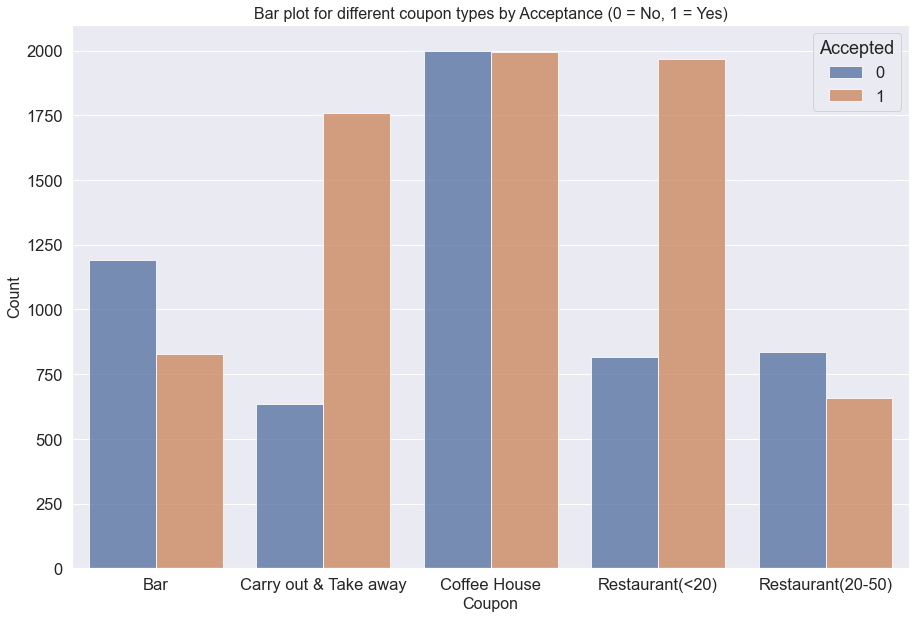

In [165]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,10))
countplot=sns.countplot(data = data, x = 'coupon', alpha=0.8,
            order=["Bar", "Carry out & Take away","Coffee House","Restaurant(<20)","Restaurant(20-50)"],
                    hue = 'Accepted')
countplot.set_xlabel("Coupon",fontsize=16)
countplot.set_ylabel("Count",fontsize=16)
countplot.set_title("Bar plot for different coupon types by Acceptance (0 = No, 1 = Yes)",fontsize=16)

The above chart shows that the highest accepted coupons were the Coffee house ones followed by cheap restaurants. The least accepted coupons were the expensive restaurants ones. Despite being the most accepted, coffee house coupons are also the most not accepted coupons. Probably this is because they are the most distributed.

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature in °F')

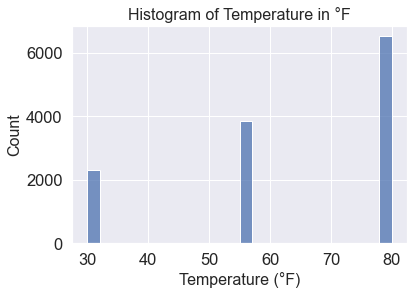

In [166]:
histplot= sns.histplot(data=data,x='temperature')
histplot.set_xlabel("Temperature (°F)",fontsize=16)
histplot.set_ylabel("Count",fontsize=16)
histplot.set_title("Histogram of Temperature in °F",fontsize=16)

It was previously shown that 'temperature' was not recorded on continuous scale - with only three possible values (30,55, or 80). So, a histogram would not be the best visualization for temperature. 

As shown below, a bar plot could be used instead.

Text(0.5, 1.0, 'Bar Plot for different temperatures in °F')

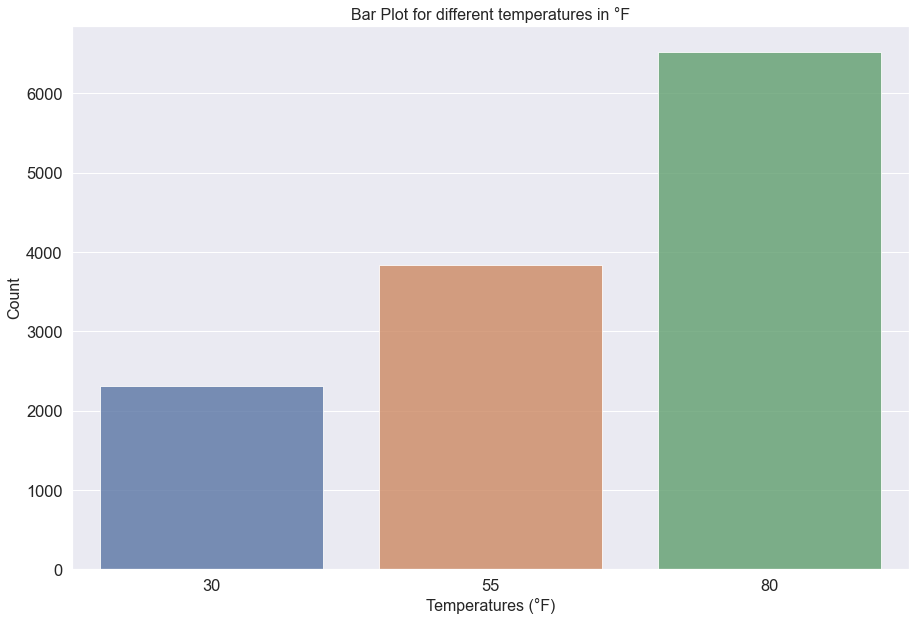

In [167]:
temperature_counts = data['temperature'].value_counts()

sns.set(font_scale = 1.5)
plt.figure(figsize=(15,10))
barplot2=sns.barplot(x = temperature_counts.index, y = temperature_counts.values, alpha=0.8)
barplot2.set_xlabel("Temperatures (°F)",fontsize=16)
barplot2.set_ylabel("Count",fontsize=16)
barplot2.set_title("Bar Plot for different temperatures in °F",fontsize=16)

The bar plot shows that higher numbers of coupons were being distributed with higher temperatures.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [168]:
#Using the .loc and .str.contains to select rows with bar coupons only

data_bar= data.loc[data['coupon'].str.contains("Bar")]

In [169]:
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null  

In [170]:
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted,bar_group,age_group
9,No Urgent Place,Kid,Sunny,80,10AM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,1,0,1,less than 1,≤25
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,1,0,1,0,less than 1,≤25
24,No Urgent Place,Friend,Sunny,80,10AM,Bar,1d,Male,21 - 25,Single,...,4 - 8,less1,1,0,0,0,1,1,less than 1,≤25
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21 - 25,Single,...,4 - 8,less1,1,0,0,1,0,1,less than 1,≤25


2. What proportion of bar coupons were accepted?


Text(0.5, 1.0, 'Percentage of drivers who accepted Bar coupons')

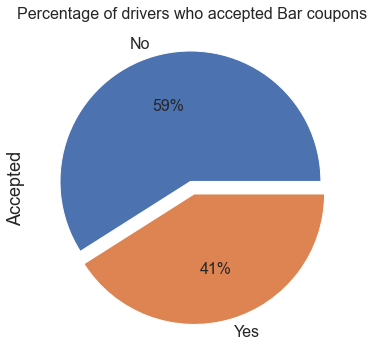

In [171]:
labels = ['No','Yes']
data_bar['Accepted'].value_counts().plot(kind='pie',autopct='%.0f%%',labels = labels, figsize = (6,6), fontsize=16, 
                                     explode = [0.05,0.05])
plt.title("Percentage of drivers who accepted Bar coupons", {"size" : 16})

In [172]:
Bar_Coupon_Acceptance = ((data_bar['Accepted'].sum()/ len(data_bar))*100).round(0)

print("The proportion of drivers who accepted the bar coupon is", Bar_Coupon_Acceptance,"%")

The proportion of drivers who accepted the bar coupon is 41.0 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [173]:
#Crosstabulation to investigate the association between number of visits and acceptance rate
pd.crosstab(data_bar['Bar'], data_bar['Accepted'],margins=True, margins_name="Total")

Accepted,0,1,Total
Bar,,,
1 - 3,140,257,397
4 - 8,33,117,150
gt8,13,36,49
less1,317,253,570
never,687,164,851
Total,1190,827,2017


In [174]:
#Same as above but with percentage
pd.crosstab(data_bar['Bar'], data_bar['Accepted'],margins=True, margins_name="Total",normalize=True)*100

Accepted,0,1,Total
Bar,,,
1 - 3,6.941001,12.741696,19.682697
4 - 8,1.636093,5.800694,7.436787
gt8,0.644522,1.784829,2.429351
less1,15.716411,12.543381,28.259792
never,34.060486,8.130887,42.191373
Total,58.998513,41.001487,100.000000


In [175]:
#First extract rows with 'bar' column values of never, less1 and 1 - 3
Bar_3_or_less_times = data_bar[(data_bar["Bar"].str.contains("never|less1|1 - 3"))]

#Dataframe with the selected rows
Bar_3_or_less_times

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted,bar_group,age_group
9,No Urgent Place,Kid,Sunny,80,10AM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,1,0,1,less than 1,≤25
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,1,0,1,0,less than 1,≤25
24,No Urgent Place,Friend,Sunny,80,10AM,Bar,1d,Male,21 - 25,Single,...,4 - 8,less1,1,0,0,0,1,1,less than 1,≤25
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21 - 25,Single,...,4 - 8,less1,1,0,0,1,0,1,less than 1,≤25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend,Sunny,80,10PM,Bar,1d,Male,26 - 30,Single,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,>25
12664,No Urgent Place,Friend,Sunny,55,10PM,Bar,2h,Male,26 - 30,Single,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,>25
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26 - 30,Single,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,>25
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26 - 30,Single,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,>25


Text(0.5, 1.0, "Percentage of drivers' groups from those who accepted Bar coupons")

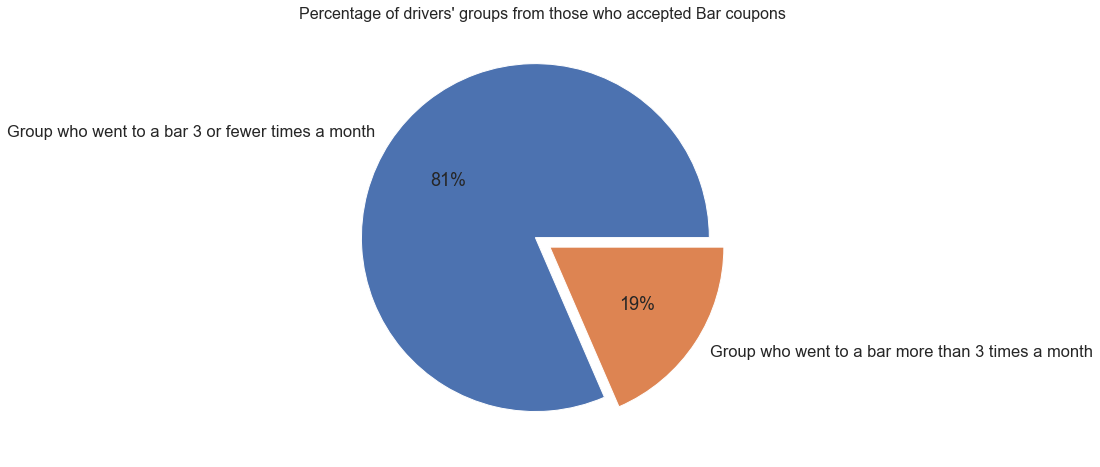

In [176]:
#Second calculate the number accepted coupons for the remaining group. This is done by subtracting the sum of 
#people accepted in Bar_3_or_less_times from the sum of people accepted in the bar coupon dataframe 


Bar_more_than_3_times = data_bar['Accepted'].sum() - Bar_3_or_less_times['Accepted'].sum()

#Finally, a Pie plot showing the comparison
plt.figure(figsize=(12,8))
labels = ['Group who went to a bar 3 or fewer times a month' , 'Group who went to a bar more than 3 times a month']
Pie = [Bar_3_or_less_times['Accepted'].sum(), Bar_more_than_3_times]
plt.pie(Pie, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who accepted Bar coupons", {"size" : 16})

The above Pie chart shows that 81% of people accepting bar coupons are those went to a bar 3 or fewer times a month. In other words, bar coupons tend to be accepted more by less frequent bar customers.


I must note here that, if we look at the crosstabulation we will find that 36 out of 49 drivers who visit a bar more than 8 times a month accepted the coupon. That is a 73% acceptance rate. Also, 117 out of 150 drivers who visit a bar from 4 to 8 times a month accepted the coupon (even higher 78% acceptance rate). The pie chart above shows the remaining group with an acceptance rate of 19%, which is correct. However, the pie chart did not consider the difference in sample size for each visiting group. In other words, because we do not have equal group sizes comparing rates in this manner is truly unfair and will lead to serious bias.

In [177]:
#In this demo, I will calculate the percentage of drivers who went to the bar 3 times or less relative to their
# sample size group


#From the cross table and using the equation: 
#(total drivers who accepted the coupon) / (total number of drivers in the bar visit group)


Row_percentage_of_Bar_3_or_less_times = (164 + 253 + 257)/(851 + 570 + 397)

Row_percentage_of_Bar_more_than_3_times = (117 + 36)/(49 + 150)

print(Row_percentage_of_Bar_3_or_less_times,Row_percentage_of_Bar_more_than_3_times)

0.37073707370737075 0.7688442211055276


Based on the calculated percentages, out of drivers who went to a bar 3 or fewer times a month have only 37% are accepting the Bar coupon compared to 77% accepting the coupon from drivers who went to a bar more than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [178]:
#I will repeat the same method as the previous question

bar_more_than_1_and_age_over_25 = data_bar[((data_bar["Bar"].str.contains("1 - 3|4 - 8|gt8"))) 
               & ((data_bar["age"].str.contains("26 - 30|31 - 35|36 - 40|41 - 45|46-50|50+")))]

Text(0.5, 1.0, "Percentage of drivers' groups from those who accepted Bar coupons")

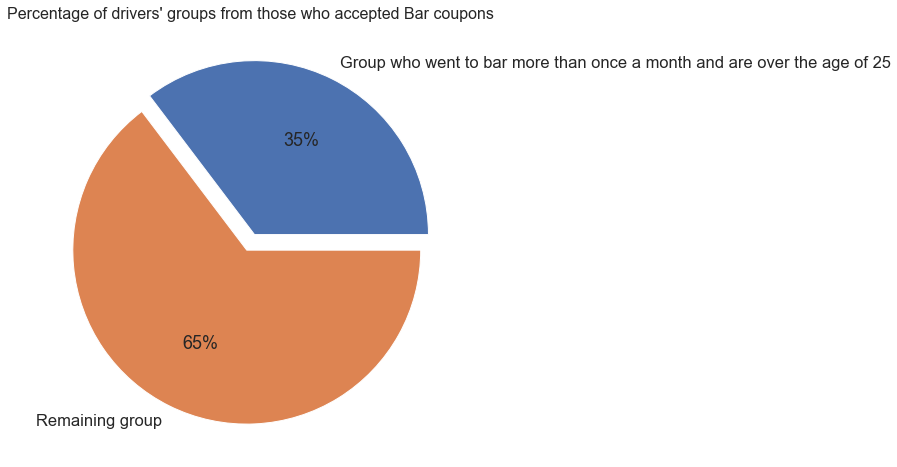

In [179]:
#Second calculate the number accepted coupons for the remaining group. This is done by subtracting the sum of 
#people accepted in Bar_3_or_less_times from the sum of people accepted in the bar coupon dataframe 
 

remaining_group2 = data_bar['Accepted'].sum() - bar_more_than_1_and_age_over_25['Accepted'].sum()

#Finally a pie chart showing the comparison in parentages
plt.figure(figsize=(12,8))
labels = ['Group who went to bar more than once a month and are over the age of 25' , 'Remaining group']
Pie2 = [bar_more_than_1_and_age_over_25['Accepted'].sum(), remaining_group2]
plt.pie(Pie2, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who accepted Bar coupons", {"size" : 16})

From the above pie chart, we can see that drivers who visit the bar more than once a month and are over 25 years tend to accept the bar coupon less often than the remaining group.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [180]:
data_bar['passanger'].value_counts()

Alone      1200
Friend      337
Partner     274
Kid         206
Name: passanger, dtype: int64

In [181]:
data_bar['occupation'].value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [182]:
#Condition here is defined as: drivers who go to bars more than once a month and had passengers that were not a 
#kid and had occupations other than farming, fishing, or forestry.

Condition = data_bar[((data_bar["Bar"].str.contains("1 - 3|4 - 8|gt8"))) 
               & ((data_bar["passanger"].str.contains("Kid") == False)) & 
                ((data_bar["occupation"].str.contains("Farming Fishing & Forestry") == False))]
remaining_group3 = data_bar['Accepted'].sum() - Condition['Accepted'].sum()


Text(0.5, 1.0, "Percentage of drivers' groups from those who accepted Bar coupons")

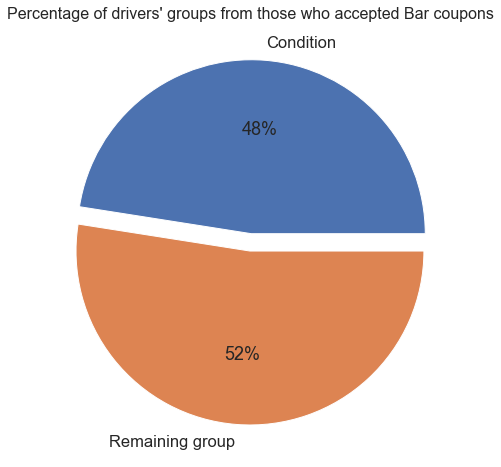

In [183]:
plt.figure(figsize=(12,8))
labels = ['Condition' , 'Remaining group']
Pie3 = [Condition['Accepted'].sum(), remaining_group3]
plt.pie(Pie3, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who accepted Bar coupons", {"size" : 16})

We can interpret the remaining group in this pie chart. The remaining group is basically drivers who visit the bar less than once a month, who have kid(s) as passenger, and work in farming, fishing, or forestry. This remaining group had a higher bar coupon acceptance than the group who does not fulfill these criteria.

6. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [184]:
#Condition1 is go to bars more than once a month, had passengers that were not a kid, and were not widowed 
#Condition2 is go to bars more than once a month and are under the age of 30 
#Condition3 is go to cheap restaurants more than 4 times a month and income is less than 50K

Condition1 = data_bar[((data_bar["Bar"].str.contains("1 - 3|4 - 8|gt8"))) 
               & ((data_bar["passanger"].str.contains("Kid") == False)) & 
                ((data_bar["maritalStatus"].str.contains("Widowed") == False))]

Condition2 = data_bar[((data_bar["Bar"].str.contains("1 - 3|4 - 8|gt8"))) 
               & ((data_bar["age"].str.contains("<21|21 - 25|26 - 30")))]

Condition3 = data_bar[((data_bar["RestaurantLessThan20"].str.contains("4 - 8|gt8"))) 
                & ((data_bar["income"].str.contains("Less than 12500|12500 - 24999|25000 - 37499|37500 - 49999")))]

In [185]:
Condition1['Accepted'].value_counts()

1    393
0    158
Name: Accepted, dtype: int64

In [186]:
remaining_group4 = data_bar['Accepted'].sum() - Condition1['Accepted'].sum()

In [187]:
Condition2['Accepted'].value_counts()

1    249
0     96
Name: Accepted, dtype: int64

In [188]:
remaining_group5 = data_bar['Accepted'].sum() - Condition2['Accepted'].sum()

In [189]:
Condition3['Accepted'].value_counts()

0    188
1    156
Name: Accepted, dtype: int64

In [190]:
remaining_group6 = data_bar['Accepted'].sum() - Condition3['Accepted'].sum()

In [191]:
#Creating a dataframe with the total acceptance counts for each condition
Acc_data = [["Condition1", 393],["Condition2", 249],["Condition2", 156]]
AccdataQ6 = pd.DataFrame(Acc_data, columns=["Different Conditions", "Number of Bar Coupon Accepted"])

In [192]:
AccdataQ6

,Different Conditions,Number of Bar Coupon Accepted
0,Condition1,393
1,Condition2,249
2,Condition2,156


Text(0.5, 1.0, 'Bar Coupon Acceptance Counts')

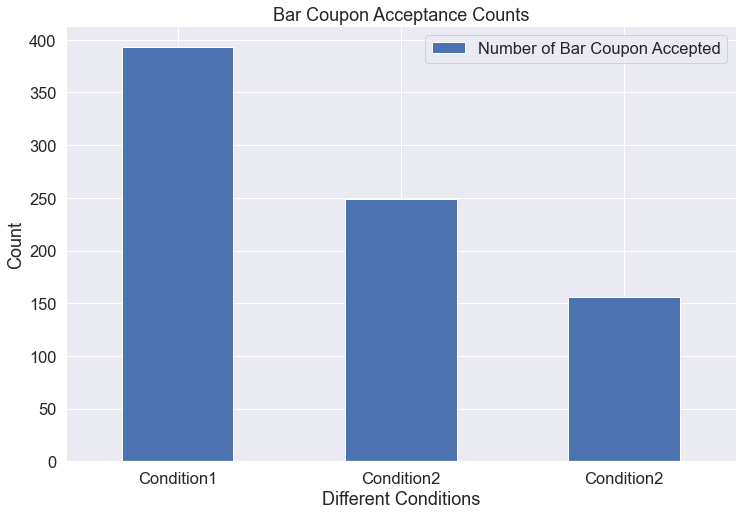

In [193]:
AccdataQ6.plot(x="Different Conditions", y="Number of Bar Coupon Accepted", kind = 'bar', figsize=(12, 8), rot = 0)
plt.ylabel("Count")
plt.title("Bar Coupon Acceptance Counts")

The bar chart above shows that drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed (i.e. Condition 1) have accepted higher number of bar coupons than other conditions.

([<matplotlib.patches.Wedge at 0x7fb8948ff9d0>,
 [Text(-0.6423070599908843, 0.9539086123344662, 'Condition3'),
  Text(0.6423070599908842, -0.9539086123344662, 'Remaining group')],
 [Text(-0.3630431208644128, 0.5391657374064374, '19%'),
  Text(0.3630431208644127, -0.5391657374064374, '81%')])

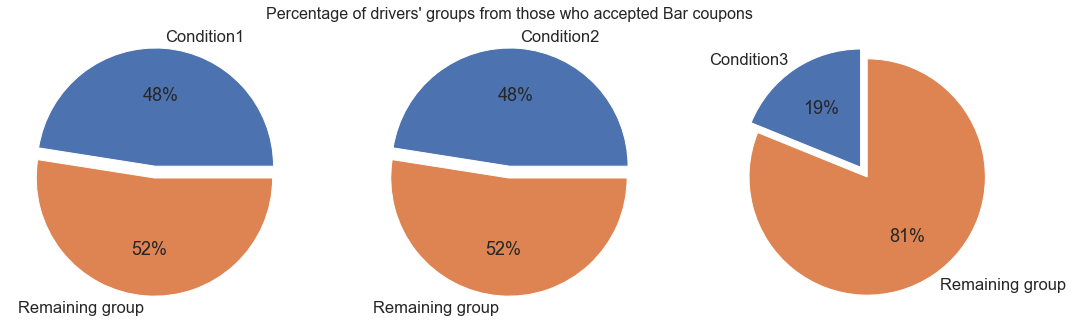

In [194]:
plt.figure(figsize=(18,8))
plt.subplot(131)
labels = ['Condition1' , 'Remaining group']
Pie4 = [Condition1['Accepted'].sum(), remaining_group4]
plt.pie(Pie4, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)

plt.subplot(132)
labels = ['Condition2' , 'Remaining group']
Pie5 = [Condition2['Accepted'].sum(), remaining_group5]
plt.pie(Pie4, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who accepted Bar coupons", {"size" : 16})

plt.subplot(133)
labels = ['Condition3' , 'Remaining group']
Pie6 = [Condition3['Accepted'].sum(), remaining_group6]
plt.pie(Pie6, autopct='%.0f%%', explode = [0.05,0.05], labels = labels, startangle = 90)


These pie charts show each condition relative to its own dataset. There is no big difference between condition 1 and 2 and the corresponding remaining groups. For condition 3 plot, drivers who go to a cheap restaurants more than 4 times a month and have an income less than 50K are less likely to accept the bar coupon compared to the remaining group.

# Extras

Hypothesis testing

Null hypothesis: There is no association between age group (≤25 and >25) and bar group (less than once a month and more than once a month). 
Alternative hypothesis: There is an association between age groups (≤25 and >25) and bar groups (less than once a month and more than once a month).

In [195]:
#using the appropriate library
import scipy.stats as stats

In [196]:
#Defiening a dataframe with sum of values of accepted bar coupons for each group 
ctab = pd.crosstab(data_bar['bar_group'], data_bar['age_group'], values = data_bar.Accepted, aggfunc='sum'
                   ,margins=True, margins_name="Total")

In [197]:
ctab

age_group,>25,≤25,Total
bar_group,,,
less than 1,288,129,417
more than 1,292,118,410
Total,580,247,827


In [198]:
#Defining the alpha level, observed, and expected values
#then calculating the p-value which must not exceed the alpha level in order to reject the null hypothesis


alpha = 0.05
chi_square = 0
rows = data_bar['bar_group'].unique()
columns = data_bar['age_group'].unique()
for i in columns:
    for j in rows:
        O = ctab[i][j]
        E = ctab[i]['Total'] * ctab['Total'][j] / ctab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Hypothesis testing")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Hypothesis testing
chisquare-score is: 0.45824727817300814  and p value is: 0.49844425119589597
Failed to reject the null hypothesis.


7.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

# Conclusion

Based on primary analysis, we can say that drivers who visit a bar more frequent are the ones who are most likely to accept the bar coupon. Also, there is no significant association between age group (≤25 and >25) and bar group (less than once a month and more than once a month) in terms of bar coupon acceptance rate. However, when we compare on subgroup to the rest, more than third of those who accepted bar coupons are above age 25 and are going to a bar more than once a month. The only conclusive finding is that frequent bar visitors who are more than 25a are more likely to reject the bar coupon.



Further analysis maybe required to see the effects of gender, time before the bar coupon expires and distance to bar. Also, comparing unbalanced subgroups as mentioned earlier should be handled with caution.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.
I would like to investigate Coffee House coupons as in a previous chart, this was the most accepted and most rejected type compared to other coupons. I want to investigate further which groups are responsible for these contradicting findings.

In [199]:
data_CH= data.loc[data['coupon'].str.contains("Coffee House")]

In [200]:
data_CH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null  

In [201]:
data_CH.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accepted,bar_group,age_group
1,No Urgent Place,Friend,Sunny,80,10AM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,0,1,0,less than 1,≤25
3,No Urgent Place,Friend,Sunny,80,2PM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25
4,No Urgent Place,Friend,Sunny,80,2PM,Coffee House,1d,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,0,less than 1,≤25
12,No Urgent Place,Kid,Sunny,55,6PM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,1,0,0,1,1,less than 1,≤25
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21 - 25,Unmarried partner,...,4 - 8,1 - 3,1,0,0,0,1,0,less than 1,≤25


Text(0.5, 1.0, 'Percentage of drivers who accepted Coffee House coupons')

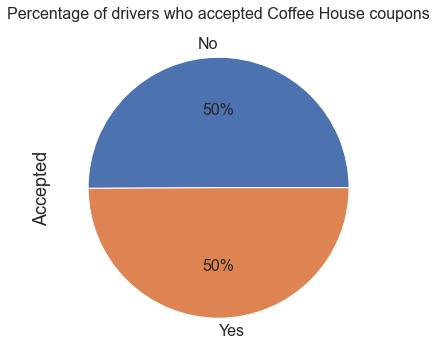

In [202]:
labels = ['No','Yes']
data_CH['Accepted'].value_counts().plot(kind='pie',autopct='%.0f%%',labels = labels, figsize = (6,6), fontsize=16)
plt.title("Percentage of drivers who accepted Coffee House coupons", {"size" : 16})

As mentioned before, there is an equal chance that a driver accepts or rejects the coffee house coupon.

In [203]:
round(pd.crosstab(data_CH['gender'], data_CH['Accepted'],normalize = True)*100,2)

Accepted,0,1
gender,,
Female,26.05,25.28
Male,24.02,24.65


Acceptance (0 = No, 1 = Yes)

The crosstabulation shows no association between gender and coffee house coupon acceptance rate.

In [204]:
round(pd.crosstab(data_CH['gender'], data_CH['maritalStatus'], values = data_CH.Accepted, aggfunc='sum'
                   ,margins=True, margins_name="Total", normalize = True)*100,2)

maritalStatus,Divorced,Married partner,Single,Unmarried partner,Widowed,Total
gender,,,,,,
Female,2.81,20.35,16.44,10.63,0.40,50.63
Male,1.15,17.74,23.66,6.57,0.25,49.37
Total,3.96,38.10,40.10,17.19,0.65,100.00


From this crosstabulation, we can see higher acceptance rates for married females (20%) and single males (24%).

Now we will investigate the education.

In [205]:
data_CH["education"].value_counts()

Some college - no degree                  1371
Bachelors degree                          1370
Graduate degree (Masters or Doctorate)     598
Associates degree                          350
High School Graduate                       279
Some High School                            28
Name: education, dtype: int64

In [206]:
round(pd.crosstab(data_CH['education'], data_CH['Accepted'],normalize = True, margins=True, 
                  margins_name="Total")*100,2)

Accepted,0,1,Total
education,,,
Associates degree,4.23,4.53,8.76
Bachelors degree,18.42,15.87,34.28
Graduate degree (Masters or Doctorate),7.33,7.63,14.96
High School Graduate,3.20,3.78,6.98
Some High School,0.28,0.43,0.70
Some college - no degree,16.62,17.69,34.31
Total,50.08,49.92,100.00


The highest rejection and acceptance rate of coffee house coupons are from drivers who are either have a bachelors' degree or are currently in college with no degree. This is due to the sample sizes of these subgroups.

In [207]:
pd.crosstab(data_CH['gender'], data_CH['education'], values = data_CH.Accepted, aggfunc='sum'
                   ,margins=True, margins_name="Total")

education,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate),High School Graduate,Some High School,Some college - no degree,Total
gender,,,,,,,
Female,100,322,170,72,12,334,1010
Male,81,312,135,79,5,373,985
Total,181,634,305,151,17,707,1995


From the above crosstabulation, we can see that males and females who accepted the coffee house coupon either have a bachelor's degree or are currently in college.

In [209]:
round(pd.crosstab(data_CH['expiration'], data_CH['Accepted'],normalize = True, 
                  margins=True, margins_name="Total")*100,2)

Accepted,0,1,Total
expiration,,,
1d,18.42,25.85,44.27
2h,31.66,24.07,55.73
Total,50.08,49.92,100.00


Text(0.5, 1.0, 'Bar plot for coffee house coupon types by Acceptance (0 = No, 1 = Yes)')

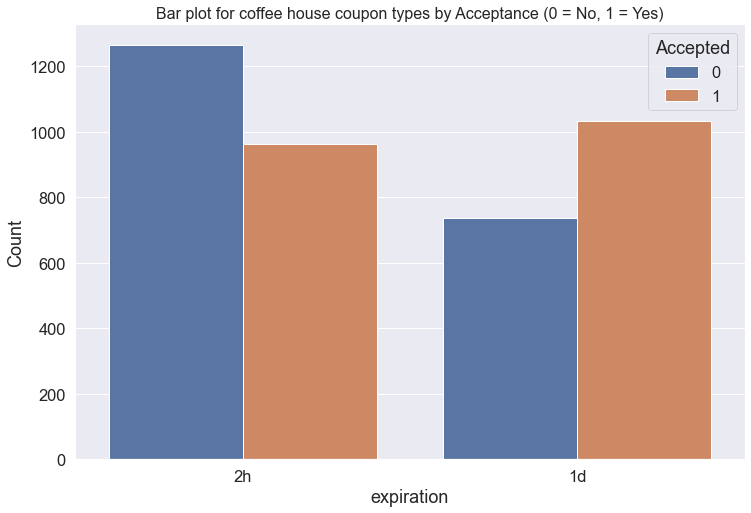

In [210]:
plt.figure(figsize=(12,8))
countplot1 = sns.countplot(x= "expiration", data = data_CH, hue = "Accepted")
countplot1.set_ylabel("Count",fontsize=18)
countplot1.set_title("Bar plot for coffee house coupon types by Acceptance (0 = No, 1 = Yes)",fontsize=16)

There is a higher chance of rejecting the coffee house coupon if it expires in 2 hours.

In [211]:
round(pd.crosstab(data_CH['temperature'], data_CH['Accepted'],normalize = True,margins=True, margins_name="Total")*100,2)

Accepted,0,1,Total
temperature,,,
30,4.43,3.53,7.96
55,17.39,14.56,31.96
80,28.25,31.83,60.09
Total,50.08,49.92,100.00


As the temperature rises the acceptance rate of coffee house coupon increase.

In [212]:
round(pd.crosstab(data_CH['CoffeeHouse'], data_CH['Accepted'],normalize = True, 
                  margins=True, margins_name="Total")*100,2)

Accepted,0,1,Total
CoffeeHouse,,,
1 - 3,9.18,16.89,26.08
4 - 8,4.23,9.23,13.46
gt8,2.93,5.63,8.56
less1,14.91,13.79,28.70
never,18.82,4.38,23.20
Total,50.08,49.92,100.00


From the above table, we can say that regular coffee house customers are the one who are more likely to accept the coupon compared to new visitors.

In [213]:
Singles_visit_3_or_more_times = data_CH[((data_CH["maritalStatus"].str.contains("Single"))) 
               & ((data_CH["CoffeeHouse"].str.contains("1 - 3|4 - 8|gt8")))]
Remaining_group = data_CH['Accepted'].sum() - Singles_visit_3_or_times['Accepted'].sum()

Text(0.5, 1.0, "Percentage of drivers' groups from those who accepted Coffee house coupons")

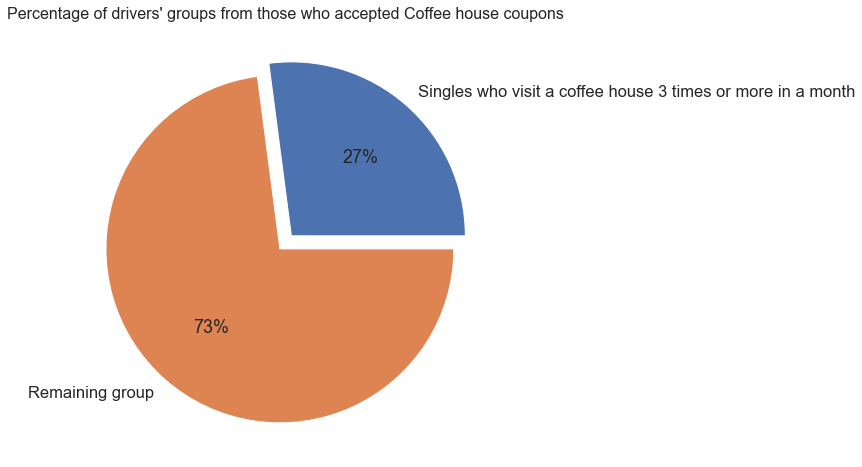

In [214]:
plt.figure(figsize=(12,8))
labels = ['Singles who visit a coffee house 3 times or more in a month' , 'Remaining group']
Pie7 = [Singles_visit_3_or_more_times['Accepted'].sum(), Remaining_group]
plt.pie(Pie7, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who accepted Coffee house coupons", {"size" : 16})

Singles who visit a coffee house 3 times or more in a month contribute to more than one quarter of drivers who accepted the coffee house coupon.

In [215]:
# Now investigating the coffee house rejection of drivers who visit coffeehouse less than once a month. 
visit_1_or_less_times =data_CH[(data_CH["CoffeeHouse"].str.contains("never|less1"))]

In [216]:
#Identifying the number of zeros in the accepted column to calculate the total rejections
Remaining_group1 = (data_CH['Accepted'] == 0).sum() - (visit_1_or_less_times['Accepted'] == 0).sum()

Text(0.5, 1.0, "Percentage of drivers' groups from those who rejected Coffee house coupons")

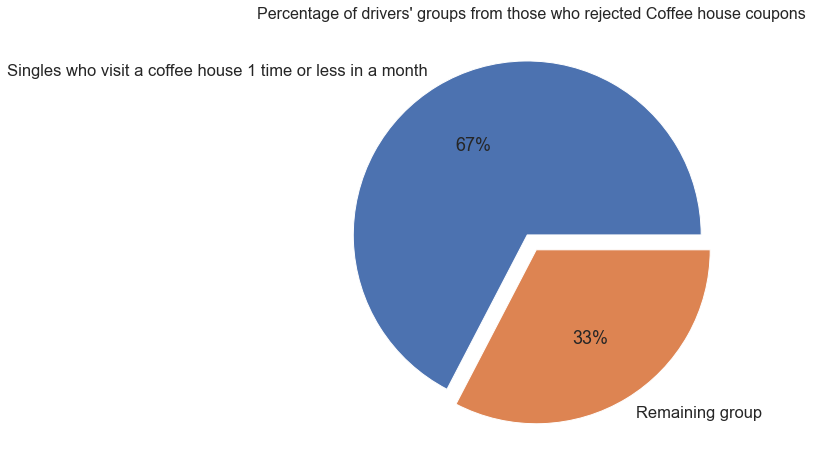

In [217]:
plt.figure(figsize=(12,8))
labels = ['Singles who visit a coffee house 1 time or less in a month' , 'Remaining group']
Pie8 = [(visit_1_or_less_times['Accepted'] == 0).sum(), Remaining_group1]
plt.pie(Pie8, autopct='%.0f%%', explode = [0.05,0.05], labels = labels)
plt.title("Percentage of drivers' groups from those who rejected Coffee house coupons", {"size" : 16})

Singles who visit a coffee house 1 time or less in a month are more likely to reject the coffee house coupon. 

# Conclusion

From the primary analysis of the coffee house coupon data, we can say there are several factors that contribute to accepting the coupons. The most prominent are being a frequent visitor single male with a bachelor’s degree or in college or being a frequent visitor married female with a bachelor’s degree or in college.

On the other hand, drivers who visit a coffee house 1 time or less in month and receive a 2-hour expiration on a coffee house coupon are more likely to reject it.